In [1]:
#clean
#Relax Assumptions
#log transformation
#create a model
# create dummies

In [76]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [6]:
raw_data= pd.read_csv('C:/Users/asus/Desktop/Udemy/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
data=raw_data.drop(['Model'],axis=1)

In [8]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


###### data.isnull()

In [9]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
##if you are removing <5% of the observations, we are free to just remove 

In [11]:
data_no_mv=data.dropna(axis=0)

In [14]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


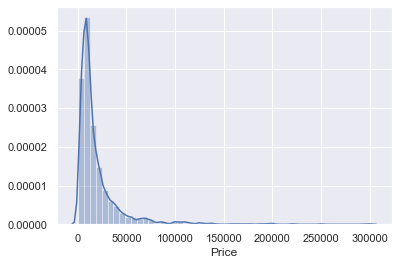

In [16]:
sns.distplot(data_no_mv['Price'])

In [17]:
##For Optimal Results we would be loooking fot a normal distribution


In [19]:
###Dealing with the outliers


In [20]:
q=data_no_mv['Price'].quantile(0.99)

In [22]:
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


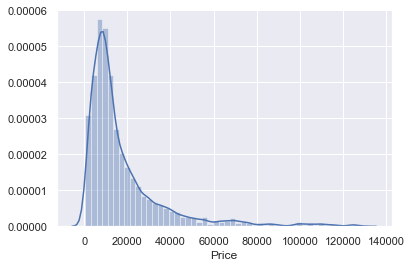

In [24]:
sns.distplot(data_1['Price'])

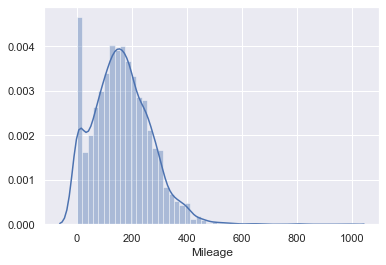

In [26]:
sns.distplot(dat-a_no_mv['Mileage'])

In [43]:
data_2=data_no_mv[data_no_mv['Mileage']<data_no_mv['Mileage'].quantile(0.99)]

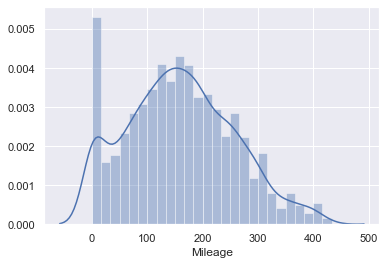

In [44]:
sns.distplot(data_2['Mileage'])

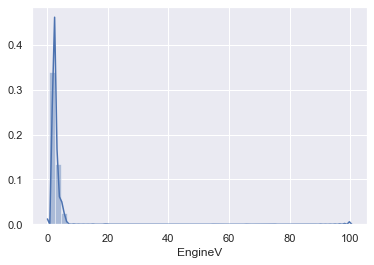

In [45]:
 sns.distplot(data_no_mv['EngineV'])

In [46]:
data_3=data_no_mv[data_no_mv['EngineV']<data_no_mv['EngineV'].quantile(0.99)]

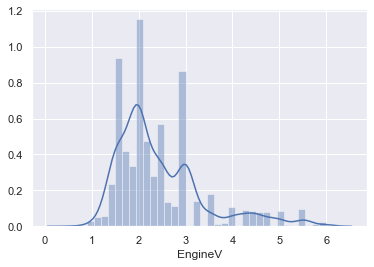

In [47]:
sns.distplot(data_3['EngineV'])

In [48]:
EngV=pd.DataFrame(raw_data['EngineV'])

In [49]:
EngV=EngV.dropna(axis=0)
EngV.sort_values(by='EngineV')

,EngineV
2512,0.60
188,0.65
3295,1.00
2725,1.00
1923,1.00
...,...
1311,99.99
3114,99.99
1264,99.99
3641,99.99


In [50]:
data_3=data_2[data_2['EngineV']<6.5]

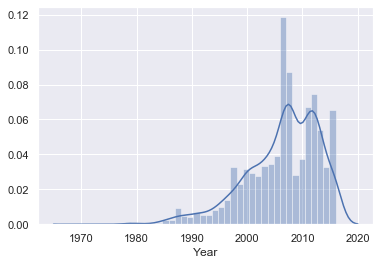

In [51]:
sns.distplot(data_no_mv['Year'])

In [53]:
data_4=data_3[data_3['Year']>data_3['Year'].quantile(0.01)]

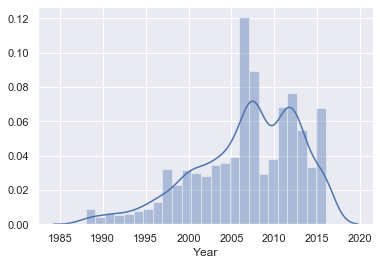

In [54]:
sns.distplot(data_4['Year'])

In [59]:
data_cleaned=data_4.reset_index(drop=True)

In [60]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3907,3907.000000,3907,3907.000000,3907.000000,3907,3907,3907.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1472,NaN,NaN,1815,3545,NaN
mean,NaN,19960.692119,NaN,158.929358,2.474771,NaN,NaN,2006.798055
std,NaN,26048.838086,NaN,96.242696,0.978819,NaN,NaN,6.127291
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7274.500000,NaN,89.500000,1.800000,NaN,NaN,2003.000000
50%,NaN,11800.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22000.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [61]:
###Checking the OLS assumptions



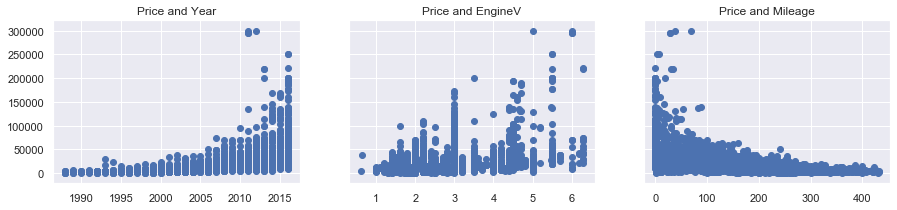

In [64]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [67]:
##Patterns are not linear in any of the above plots
##We cannot run linear regression in any of the above ones
##So we should transform one or more variables

## When we look at the distribution plot of the price,
## It is not normally distributed
##And from there its relationships with the other rather normally distributed
##features is not linear

##Log Transformation is a common way to deal with this issue
##Log Transformation is especially useful when facing exponential relationsnips


In [68]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3902,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3903,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3904,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3905,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


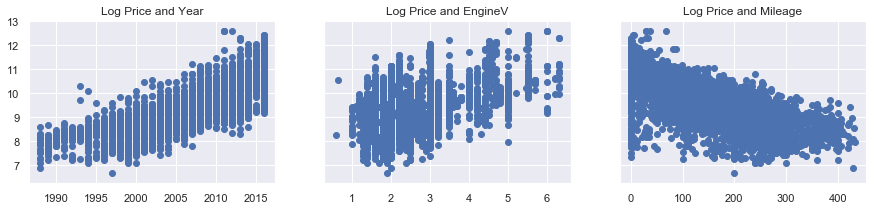

In [69]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [70]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

##MultiColinearity

In [72]:
##Generally we deal with the no endogenity Assumption
##THere are tests to check if it is violated or one can take the residuals and find their corelation with each independent x
 

In [ ]:
##NOrmality --> Whether following Central Limit Theorem
##Zero MEan --> Inclusion of the intercept in the regression
##Homoscedasticity --> Already implemented Log Transformation to 
##NO Autocorrelation


In [73]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [74]:
##VIF is the best way to check the multicollinearity 
##Sklearn don't have method to find the Multicollinearity
##So we go to statsmodels.api for this


##Variance Inflation Factor produces a measure which estimates how much larger the 
##square root of the standard error of an estimate is compared to where
##the variable was completely uncorrelated with the other predictors.




In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [79]:
 vif   ##If VIF=1, No multicollinearity,,, values bet 1 and 5 is ok
    ##VIF>10 is completely unacceptable

,VIF,features
0,3.703266,Mileage
1,10.323287,Year
2,7.400348,EngineV


In [80]:
##SO here we are removing Year

data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [81]:
data_no_multicollinearity



,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3902,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3903,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3904,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3905,BMW,sedan,1,3.5,Petrol,yes,8.779557


In [82]:
##Create Dummy Variables

#We need to create n-1 dummy variables for n features
##One less because we may imntroduce multi collinearity by doing so

In [83]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [84]:
data_with_dummies.head() 
#Dummies are used to Convert categorical variable into dummy/indicator variables.

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [85]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables2=data_with_dummies[['Mileage','EngineV','log_price','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']]
vif2=pd.DataFrame()
vif2['VIF']=[variance_inflation_factor(variables2.values,i) for i in range(variables2.shape[1])]
vif2['features']=variables2.columns

In [90]:
vif2.sort_values(by='VIF')

,VIF,features
15,1.081510,Engine Type_Other
9,1.578076,Body_hatch
10,1.599663,Body_other
14,1.703913,Engine Type_Gas
12,1.802949,Body_vagon
5,1.829070,Brand_Mitsubishi
6,2.277083,Brand_Renault
7,2.410711,Brand_Toyota
16,2.522609,Engine Type_Petrol
13,2.564712,Body_van


In [91]:
cols=['log_price','Mileage','EngineV','Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']


In [92]:
data_preprocessed=data_with_dummies[cols]

In [93]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [94]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

In [95]:
##Scale the Data

In [97]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
inputs_scaled=scaler.transform(inputs)

In [99]:
 ##Dummies shouldn't be scaled, Anyway it doesn't affect here.
    ##We will look on individual scaling later

In [100]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

In [103]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
y_hat=reg.predict(x_train)

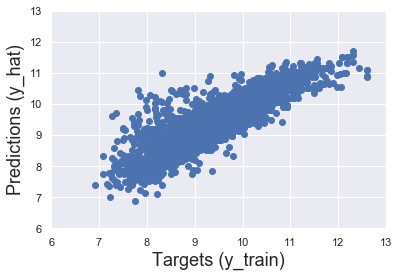

In [108]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

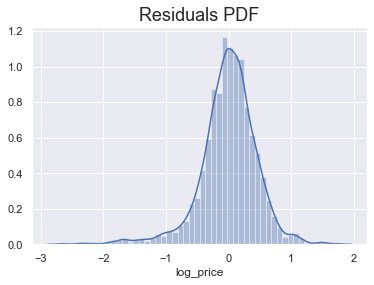

In [110]:
sns.distplot(y_train-y_hat)  ##REsiduals is y_train-y-hat
plt.title('Residuals PDF',size=18)

In [111]:
##Errors must be normally distributed with mean of 0 
##There is a long train on the left
##It implies that y_train-y_hat is much lower than the mean
##A much price is predicted than it is. 

In [113]:
reg.score(x_train,y_train)

0.7520453281718504

In [114]:
reg.intercept_


9.43753512973232

In [115]:
reg.coef_

array([-0.47713375,  0.25279341,  0.02659834,  0.03600588, -0.12726982,
       -0.16670307, -0.04848545, -0.07180363, -0.14024984, -0.09622117,
       -0.19162974, -0.10890609, -0.15699644, -0.12248327, -0.03067591,
       -0.14136631,  0.31071348])